In [2]:
%load_ext autoreload
%autoreload 2

from rcwa import Source, Layer, LayerStack, Crystal, Solver, RectangularGrating
from rcwa.shorthand import complexArray
import numpy as np
import matplotlib.pyplot as plt

In [43]:
reflection_layer = Layer(er=1.0, ur=1.0)
transmission_layer = Layer(er=9.0, ur=1.0)

wavelength = 0.5
deg = np.pi / 180
k0 = 2*np.pi/wavelength
theta = -45 * deg
phi = 0 * deg
# pTEM = 1/np.sqrt(2)*complexArray([1,1j])
pTEM = complexArray([1, 0]) #TE = 100%, y-component only, 
source = Source(wavelength=wavelength, theta=theta, phi=phi, pTEM=pTEM, layer=reflection_layer)

print(f"X amplitude of source = {source.pX}")
print(f"Y amplitude of source = {source.pY}")

X amplitude of source = (-0+0j)
Y amplitude of source = (-1+0j)


In [44]:

crystal_thickness = 0.5

N_harmonics = 81

period = 0.5

F = 0.05
f0 = 0.016
Nx = 2000

air_layer = Layer(er=1.0, ur=1.0, thickness=0.35)
grating_layer_top = RectangularGrating(period=period, thickness=0.15, er=1.497**2, er_void=1.0, ur=1.0, ur_void=1.0, nx=Nx, groove_width=0.25, offset=0.0)
oxide_sandwich_layer = Layer(er=1.46766**2, ur=1.0, thickness=0.05)
substrate_layer = Layer(er=5.00237**2, ur=1.0, thickness=0.7)

tot_off = 0.066
grating_layer_bottom = RectangularGrating(period=period, thickness=0.15, er=5.00237**2, er_void=1.46766**2, ur=1.0, ur_void=1.0, nx=Nx, offset=tot_off, groove_width=0.25)
layer_stack = LayerStack(air_layer, grating_layer_top, oxide_sandwich_layer, grating_layer_bottom, substrate_layer, incident_layer=reflection_layer, transmission_layer=transmission_layer)

solver_1d = Solver(layer_stack, source, N_harmonics)
results = solver_1d.solve()

1/1 |############################################################|Time: 0:00:01


# Plotting the Geometry

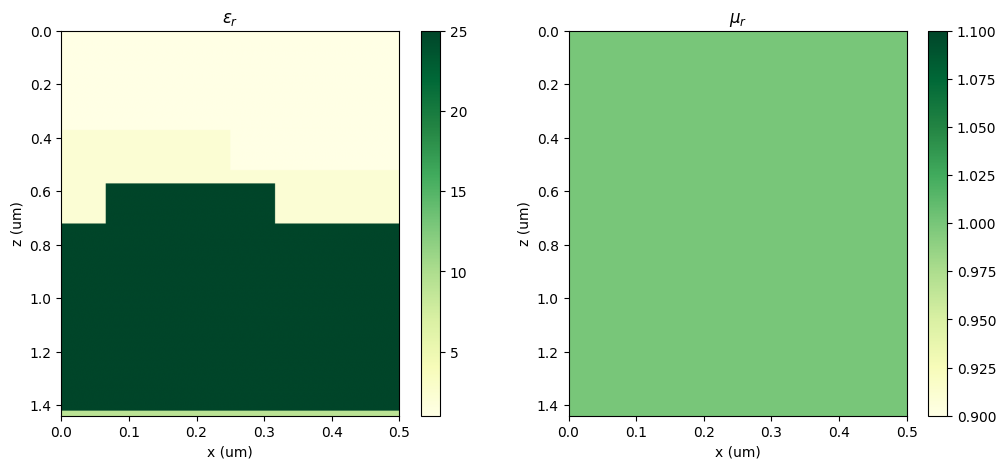

In [45]:
er_matrix_global, ur_matrix_global = layer_stack.er_ur_geometry(Nx)

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(er_matrix_global, 
           aspect="auto", 
           extent=(0, period, layer_stack.total_thickness, 0), 
           cmap=plt.get_cmap("YlGn"))
plt.xlabel("x (um)")
plt.ylabel("z (um)")
plt.title(r"$\varepsilon_r$")
plt.colorbar()

plt.subplot(122)
plt.imshow(ur_matrix_global, 
           aspect="auto", 
           extent=(0, period, layer_stack.total_thickness, 0),
           cmap=plt.get_cmap("YlGn"))
plt.xlabel("x (um)")
plt.ylabel("z (um)")
plt.title(r"$\mu_r$")
plt.colorbar()

# Plotting the Kx, Ky matrices

In [46]:
kx_normalized = solver_1d.kx_vector
ky_normalized = solver_1d.ky_vector

Text(0, 0.5, 'Im$(k_{x, m})$')

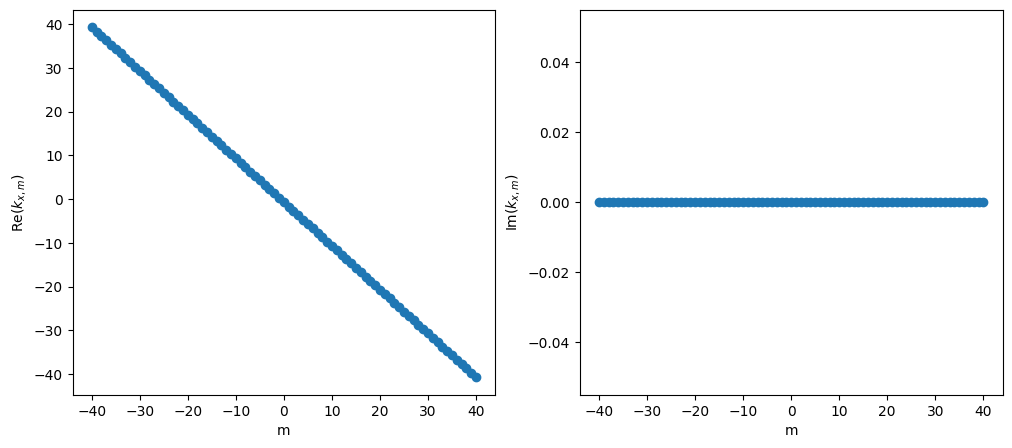

In [48]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(np.arange(- (N_harmonics//2), N_harmonics//2+1), np.real(kx_normalized))
plt.xlabel("m")
plt.ylabel(r"Re$(k_{x, m})$")
plt.subplot(122)
plt.scatter(np.arange(- (N_harmonics//2), N_harmonics//2+1), np.imag(kx_normalized))
plt.xlabel("m")
plt.ylabel(r"Im$(k_{x, m})$")

In [52]:
reflectedEx, reflectedEy, reflectedEz = solver_1d.reflectedElectricComponents_1D()

In [49]:
results["R"].sum()

np.float64(0.3914445780659242)

In [50]:
results["RTot"]

np.float64(0.3914445780659242)

In [53]:
np.square(np.abs(reflectedEy)).sum()

np.float64(0.3233408716467453)

Text(0.5, 0, 'm')

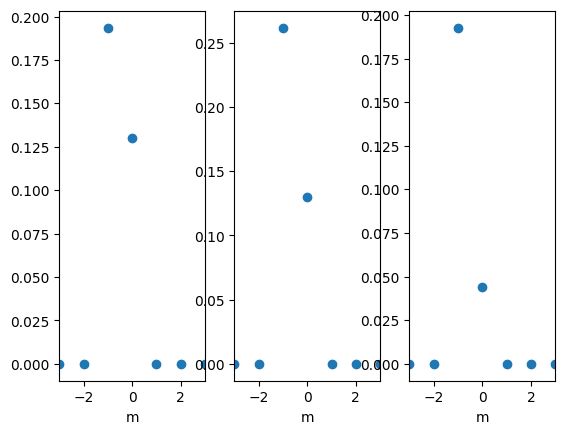

In [54]:
plt.subplot(131)
plt.scatter(np.arange(- (N_harmonics//2), N_harmonics//2+1), np.square(np.abs(reflectedEy)))
plt.xlim([-3, 3])
plt.xlabel("m")
# plt.ylabel(r"Im$(k_{x, m})$")
plt.subplot(132)
plt.scatter(np.arange(- (N_harmonics//2), N_harmonics//2+1), results["R"])
plt.xlim([-3, 3])
plt.xlabel("m")
plt.subplot(133)
plt.scatter(np.arange(- (N_harmonics//2), N_harmonics//2+1), Rs)
plt.xlim([-3, 3])
plt.xlabel("m")

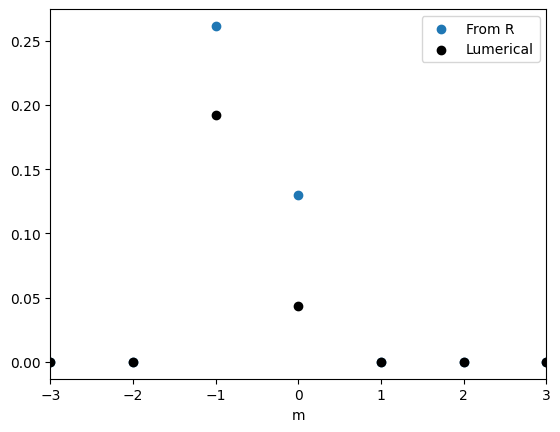

In [55]:

# plt.scatter(np.arange(- (N_harmonics//2), N_harmonics//2+1), np.square(np.abs(reflectedEy)), label="From E-field")
plt.scatter(np.arange(- (N_harmonics//2), N_harmonics//2+1), results["R"], label="From R")
plt.scatter(np.arange(- (N_harmonics//2), N_harmonics//2+1), Rs, c="k", label="Lumerical")
plt.xlim([-3, 3])
plt.xlabel("m")
plt.legend()

In [24]:
np.square(np.abs(reflectedEy))[39:42]

array([6.97328645e-08, 1.29865190e-01, 1.65254727e-01])

### Reading the Lumerical Rs file

In [16]:
filename = './20250929_LumericalOffset0066/20250929_Offset0066_Rs.txt'

# Read the file, skipping the first line
with open(filename, 'r') as f:
    lines = f.readlines()[1:]  # Skip first line

# Convert lines to a 2D numpy array (assuming whitespace-separated values)
Rs = np.array([list(map(float, line.split())) for line in lines])

In [18]:
Rs[39:41]

array([[0.19257358],
       [0.04383151]])

Text(0.5, 0, 'm')

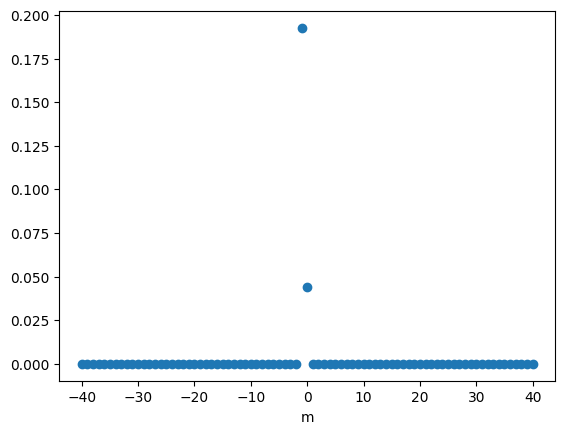

In [17]:
plt.scatter(np.arange(- (N_harmonics//2), N_harmonics//2+1), Rs)
plt.xlabel("m")
# plt.ylabel(r"Im$(k_{x, m})$")

# Visualizing the S-matrix

| Component of the S-matrix | Meaning |
|---|---|
| `S[0, 0]` | Reflection | 
| `S[1, 0]` | Transmission | 


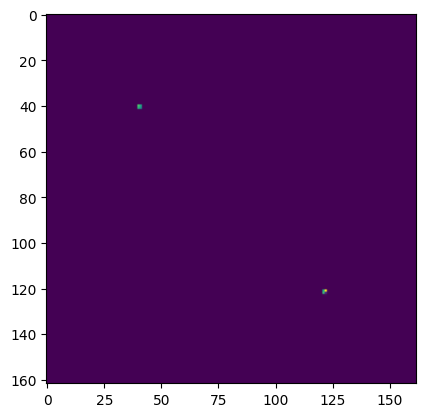

In [13]:
plt.imshow(np.abs(solver_1d.SGlobal[0, 0]))

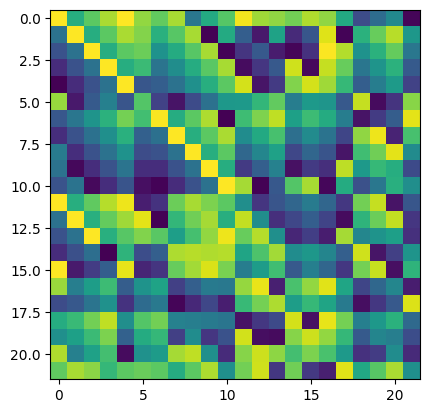

In [51]:
plt.imshow(np.angle(solver_1d.SGlobal[0, 0]))

def s_incident(source, n_harmonics: Union[int, ArrayLike]):
    totalNumberHarmonics = np.prod(n_harmonics)
    return np.hstack((source.pX * kroneckerDeltaVector(totalNumberHarmonics),
            source.pY * kroneckerDeltaVector(totalNumberHarmonics)))


# Angular spectrum decomposition of the reflected waves $A(k_x, k_y)$

In [54]:
reflectedEx, reflectedEy, reflectedEz = solver_1d.reflectedElectricComponents_1D()

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$Phase(E_x)$')

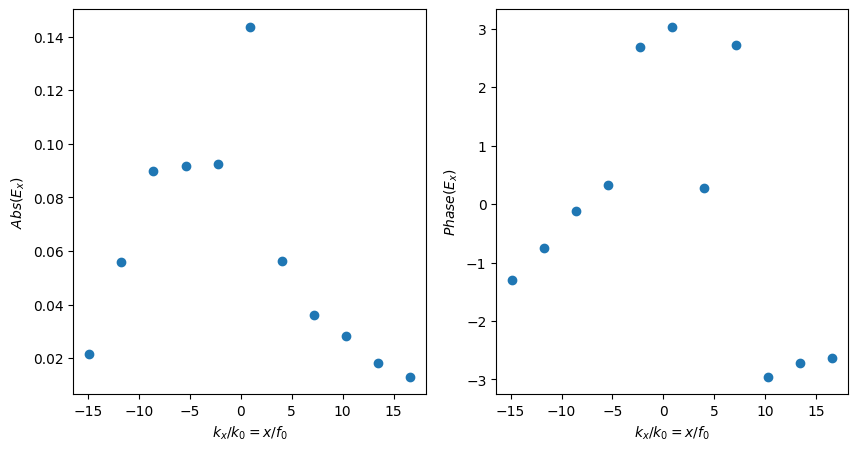

In [55]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(reflectedEx))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Abs(E_x)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(reflectedEx))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Phase(E_x)$")

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$Phase(E_y)$')

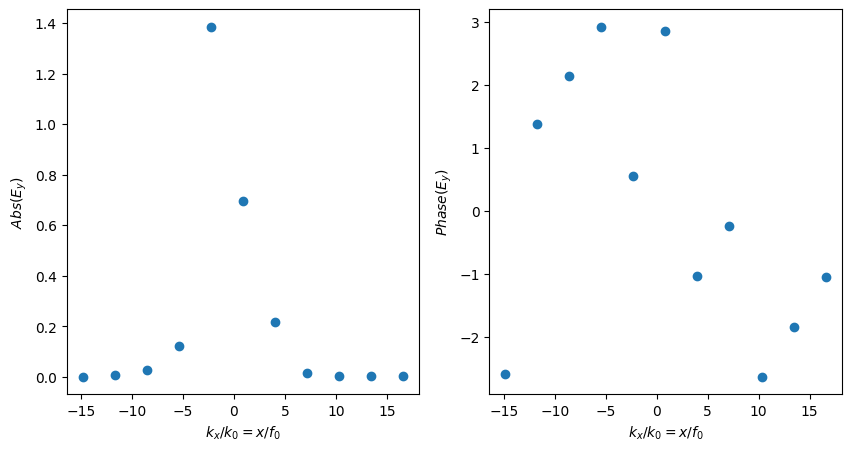

In [56]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(reflectedEy))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Abs(E_y)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(reflectedEy))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Phase(E_y)$")

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, '$Phase(E_z)$')

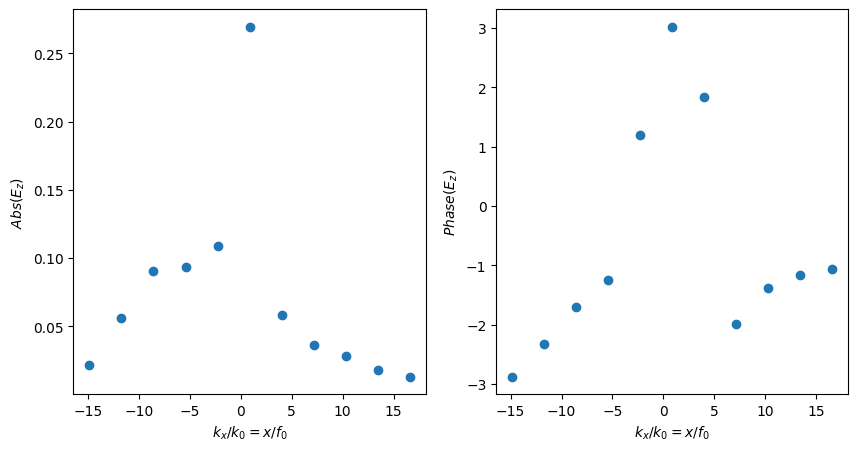

In [57]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(kx_normalized, np.abs(reflectedEz))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Abs(E_z)$")
plt.subplot(122)
plt.scatter(kx_normalized, np.angle(reflectedEz))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"$Phase(E_z)$")

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'Intensity')

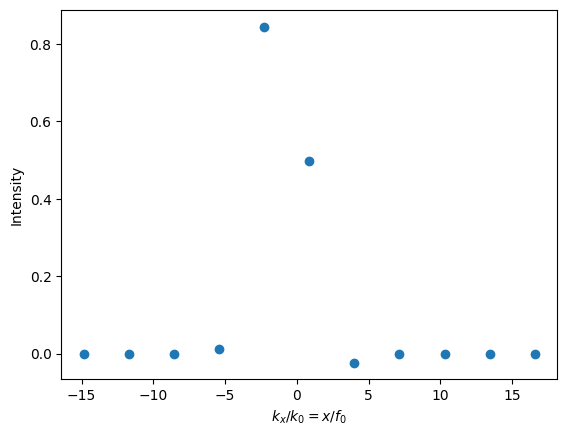

In [73]:
ReflectedHarmonicsIntensity = np.square(reflectedEx) + np.square(reflectedEy) + + np.square(reflectedEz)
plt.scatter(kx_normalized, ReflectedHarmonicsIntensity)
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"Intensity")

/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/yauckwilliam/bluesky/lib/python3.12/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0.5, 1.0, 'Calculated by RCWA')

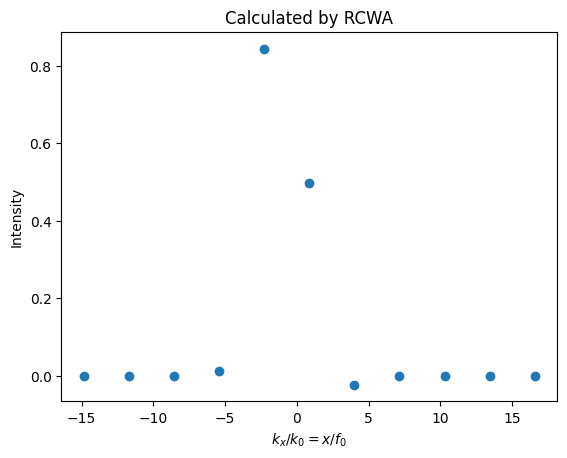

In [61]:
plt.scatter(kx_normalized, np.square(solver_1d.rx) + np.square(solver_1d.ry) + np.square(solver_1d.rz))
plt.xlabel(r"$k_x/k_0 = x/f_0$")
plt.ylabel(r"Intensity")
plt.title("Calculated by RCWA")